In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import dask.dataframe as dd

         price  size           time  snapshot  level
8000     83.72     1  1740344668651         3   64.5
16002    83.72     0  1740344668753         4   64.5
24004    83.72     1  1740344668651         5   64.5
32006    83.72     0  1740344668753         5   64.5
40009    83.72     1  1740344668651         6   64.5
...        ...   ...            ...       ...    ...
992279   83.72     0  1740344668753        10   64.5
1000282  83.72     1  1740344668651        10   64.5
1008284  83.72     0  1740344668753        10   64.5
1016286  83.72     1  1740344668651        10   64.5
1024288  83.72     0  1740344668753        10   64.5

[128 rows x 5 columns]
          price  size           time  snapshot  level
32008    100.44     0  1740344668868         5   16.5
64017    100.44     0  1740344668868         6   16.5
96026    100.44     0  1740344668868         7   16.5
128035   100.44     0  1740344668868         7   16.5
160044   100.44     0  1740344668868         8   16.5
192053   100.44 

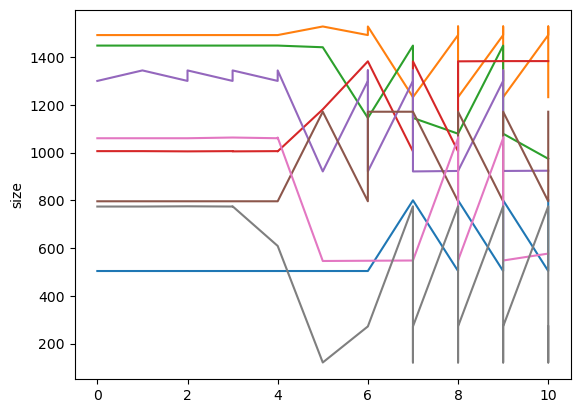

In [ ]:
df = pd.read_parquet("/Users/hanifadelekan/dev/Trading/bid_order_book.parquet")
df.reset_index(inplace=True)

#df.set_index(['snapshot','price'], inplace=True)

df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['size'] = pd.to_numeric(df['size'], errors='coerce')


'''df['psum'] = df['price'] * df['size']
z = df.groupby('snapshot')
#z['psum'].sum()

z.get_group(0)'''
z = df.groupby('price')


for group in z:
    #print('name: ',group[0],'\n','length: ',len(group[1]),'\n','standard deviation: ',group[1]['size'].std()) #find spoofing with decision tree random forest or logistic regression
    #print(group)
    pass

for group in z:
    #group[1]['level'] = group[1]['price'].rank(ascending=False)
  
    if group[1]['size'].std() > 100:
        plt.plot(group[1]['snapshot'],group[1]['size'])
plt.ylabel('size')
plt.show()

